# Assignment-04-Simple Linear Regression-1

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
# import dataset
dataset=pd.read_csv('C:/Users/Dell/Desktop/DS Assignments/delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Data Visualization

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

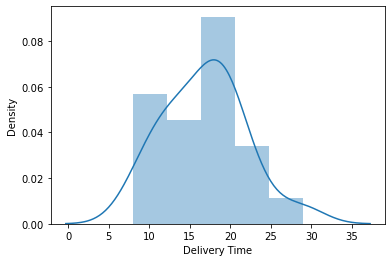

In [6]:
sns.distplot(dataset['Delivery Time'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

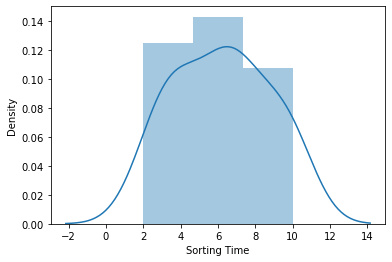

In [10]:
sns.distplot(dataset['Sorting Time'])

In [19]:
import matplotlib.pyplot as plt

In [20]:
df= dataset['Delivery Time'].transform([np.sqrt, np.exp, np.log, np.reciprocal])
df

,sqrt,exp,log,reciprocal
0,4.582576,1.318816e+09,3.044522,0.047619
1,3.674235,7.294164e+05,2.602690,0.074074
2,4.444097,3.778470e+08,2.983153,0.050633
3,4.898979,2.648912e+10,3.178054,0.041667
4,5.385165,3.931334e+12,3.367296,0.034483
5,3.917908,4.638956e+06,2.731115,0.065147
6,4.358899,1.784823e+08,2.944439,0.052632
7,3.082207,1.335973e+04,2.251292,0.105263
8,4.230839,5.941160e+07,2.884801,0.055866
9,4.330127,1.390022e+08,2.931194,0.053333


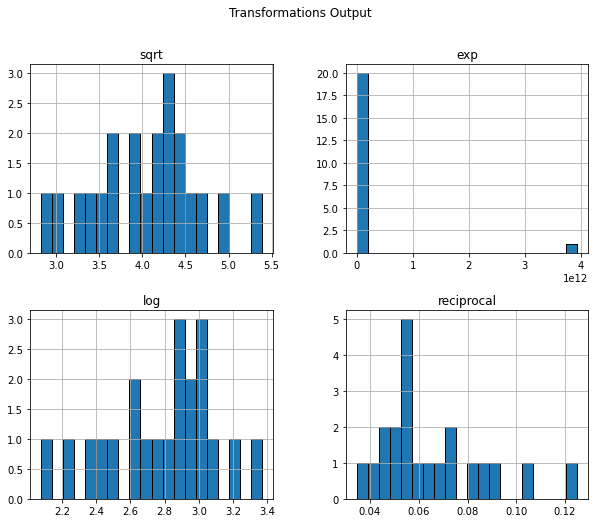

In [21]:
df.hist(bins=20, layout = (2,2), edgecolor='k', figsize=(10,8))
plt.suptitle('Transformations Output')
plt.show()

## Feature Engineering

In [7]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Correlation Analysis

In [8]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

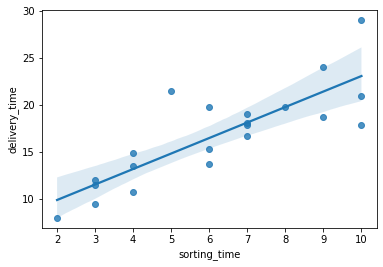

In [9]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

## Model Building

In [10]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

## Model Testing

In [11]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [12]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [13]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model Predictions

In [14]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [15]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [16]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [17]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64